<a href="https://colab.research.google.com/github/nairsatish/Colab/blob/master/4540LinReg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Welcome to Linear Regression for Dummies!**

Linear regression is a common statistical method used to relate variables by fitting a linear equation to observed data. 

In univariate linear regression, we only use two variables in our analysis.
One of these variables is an independent input variable, or feature. The other is a dependent output variable.

In multivariate linear regression, we use multiple independent input varaibles to try to predict out output variable.

Lets explore this concept in an example of univariate linear regression... 

**Customer Needs**

For this example, you are listing agent helping a customer decide what price to sell their house for based off of the size of their home.

To start, we must look around the market and see what other houses are selling for based off of their areas.

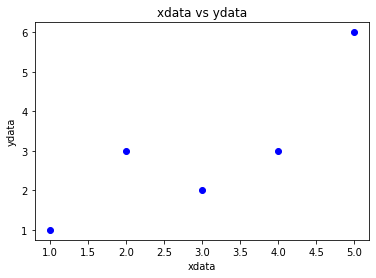

   xdata  ydata
0      1      1
1      2      3
2      3      2
3      4      3
4      5      6


In [ ]:
# Include data manipulation libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# sample dataset
sampleData = {
    
    "xdata": [1, 2, 3, 4, 5],   # xdata
    "ydata": [1, 3, 2, 3, 6]    # ydata

}

# Convert data to pandas dataframe for easy manipulation
sampleDF = pd.DataFrame(sampleData)


# Display the market data
plt.scatter(sampleDF["xdata"], sampleDF["ydata"], marker = "o", color = "b")
plt.xlabel("xdata")
plt.ylabel("ydata")
plt.title("xdata vs ydata")
plt.show()

print(sampleDF)

**Problem Definition**

The customer would like us to find a listing price for their house based off of their house size of 2300 ft^2.

First we must decide how we would like to do this; since this is a tutorial on linear regression, we will choose to use a linear regression model.

The independent variable of our linear regression will be the area of the house, and the output variable will be the price of the house.

We have plotted the data of house price vs area for a subset of houses that are for sale in your market place.

An equation of form y = mx + b must be found to fit this data well.
We will define m = theta1 and b = theta0.

The equation we use to create the model is called the hypothesis. The hypothesis equation connects the input to the system (area of house) and connects it to the output of the system (price of these house).


**Mathematical Solution**

Now that we have decided to do a linear regression and we know we will use an equation of form y = (theta1)x + theta0, what now?

We now must select values of theta1 and theta0 that will create a line that best fits through the graph.

I have plotted below the market data as well as some linear equations to show that many different lines have the potential to represent the data.



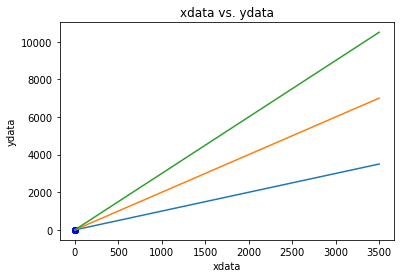

In [34]:
# Display the market data
plt.scatter(sampleDF["xdata"], sampleDF["ydata"], marker = "o", color = "b")
plt.xlabel("xdata")
plt.ylabel("ydata")
plt.title("xdata vs. ydata")

# Display potential linear regressions
x = np.linspace(0,3500,1000)
y = 1*x + 1
y2 = 2*x + 2
y3 = 3*x + 1

plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)

plt.show()

**Mathematical Solution Cont'd**

Of the three lines that are plotted, we can visually deduce that the red line is the best fit. 

However, could there be a line better than the red one? How do we find the equation of such a line wihtout having to make guesses over and over?

What parameters are we using to decide which lines are better?

**The Cost Function**

All of the above stated questions can be sovled by the cost funciton.

The cost function is a function of theta1 and theta0, and serves to find the values of theta1 and theta0 such that the difference between our hypothesis equation and our predicted values is minimized.

The cost function for univariate linear regression is given as:

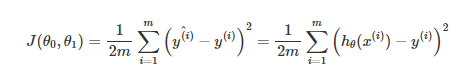

By minimizing the distance between the predicted and actual values of the output variable, we are arriving at values of theta1 and theta0 that almost objectively best describe our data!

To minimize the cost function, we must recall a concept from Calculus: optimization by differentiation.

Recall that minimums and maximums of functions exist at x-values where the derivative of that function is zero.

To minimize the cost fucntion, its derivative must be taken.

Lucky for us, we do not need to manually do this.

In fact, we can use existing functions to train models on our dataset and do all the heavy lifting for us!


**Gradient Descent**

During gradient descent for univariate linear regression, we have two update rules.

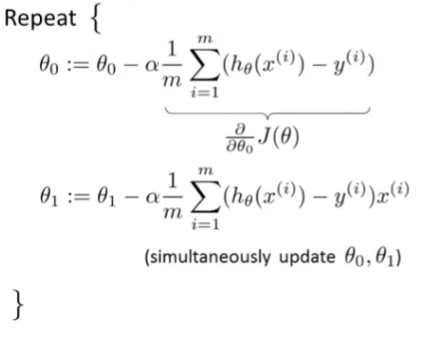

As previously mentioned, you do not have to explicitly code these solutions and updates; there are libraries written for the purpose of computing these for you.

In [ ]:
# Reshape data for better gradient descent
x = marketDF["xdata"].values.reshape(-1,1)
y = marketDF["ydata"].values.reshape(-1,1)

**Feature Scaling**

Why did we just reshape our data?

Gradient descent works to find local minima by incrementing towards smaller and smaller values of the cost function. Thus, we want to minimize (no pun intended) the paths it can take to get to the desired minimum.

To do this, we would like our data to all have a similiar range of values; in our example we use [-1,1]. 

Having our data be in similiar ranges prevents gradient descent from "zig-zagging" to the minimum, which can take loads of extra time.

The figure below shows this zig-zag vs. straight descent very well:

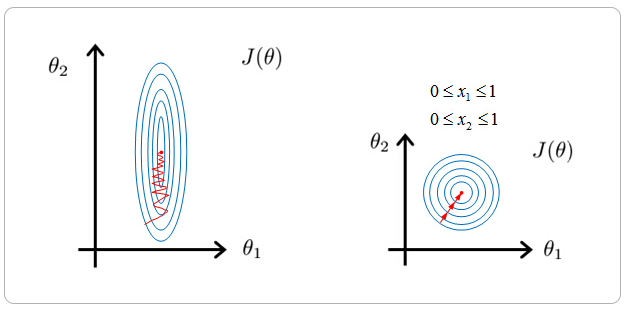



In [ ]:
# Split data into a training and testing set
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.28)


**Test and Train Datasets**

It is important to split you data into a test data set and a train data set. 

The train data set wil be the data used to find the parameters theta0 and theta1.

The test data set will be used to statistically analyze how well the hypothesis fits data it has "never seen" before. 

This will allow us to assess its value in classifying new information.

In [ ]:
# Make a linear regression object
regr = linear_model.LinearRegression()

# Train the model with you data set
regr.fit(X_train, y_train)

# Make predictions with your test set
prediction = regr.predict(X_test)


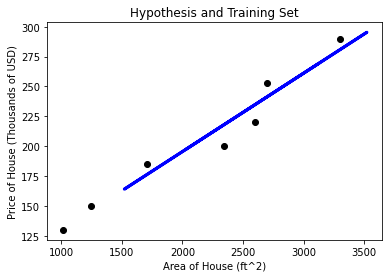

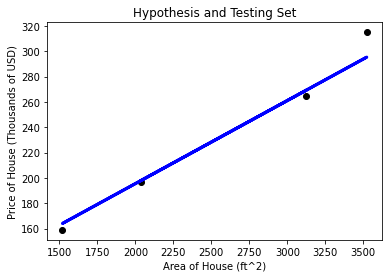

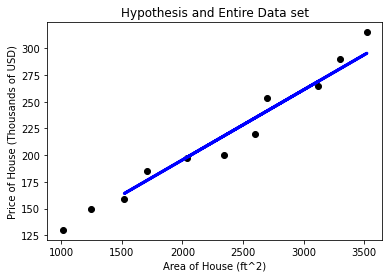

In [ ]:
# Plot the hypothesis w/ the training set
plt.scatter(X_train, y_train, color='black')
plt.plot(X_test, prediction, color='blue', linewidth = 3)

plt.xlabel('Area of House (ft^2)')
plt.ylabel('Price of House (Thousands of USD)')
plt.title("Hypothesis and Training Set")
plt.show()

# Clear figure window
plt.clf()

# Plot the hypothesis w/ the test set
plt.scatter(X_test, y_test, color = 'black')
plt.plot(X_test, prediction, color='blue', linewidth = 3)

plt.xlabel('Area of House (ft^2)')
plt.ylabel('Price of House (Thousands of USD)')
plt.title("Hypothesis and Testing Set")
plt.show()

# Clear figure window
plt.clf()

# Plot hypothesis and entire data set
plt.scatter(x, y, color = 'black')
plt.plot(X_test, prediction, color='blue', linewidth = 3)

plt.xlabel('Area of House (ft^2)')
plt.ylabel('Price of House (Thousands of USD)')
plt.title("Hypothesis and Entire Data set")
plt.show()

**Statistical Analysis**

The coefficient here is the slope of our hypothesis line!

The mean squared error value is a measure of the acurracy of ourmodel. From what I could find, there is no desired number here since it is dependent on the scale of the data. It can be used as a tool to choose between models that are being run on the same data.

The coefficient of determination ranges from 0-1, with 1 being a perfect match of hypothesis to data. Our hypothesis fits fairly well at a value of 0.97

In [ ]:
# The coefficients
print('Coefficient: \n', regr.coef_)

# Mean squared error
print('\n')
print('Mean Squared Error: %.2f'
      % mean_squared_error(y_test, prediction))

# Coefficient of determination: 1 is perfect prediction
print('\n')
print('Coefficient of determination: %.2f'
      % r2_score(y_test, prediction))

Coefficient: 
 [[0.06554941]]


Mean Squared Error: 106.99


Coefficient of determination: 0.97


**Multivariate Linear Regression**

Linear regression with multiple input variables works the exact same way as with one variable with slight changes to the hypothesis and cost funciton.

**Hypothesis**

The hypothesis for multivariate linear regression is given as:

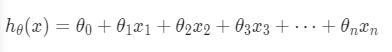

This is very similiar to the univariate hypothesis, just with a new term for each addition input!

**Visualize the Solution**

Just like in the case of univariate linear regression, there are multiple lines that may seem to fit the data fairly well if you look at them (I will not graph these, refer back to previous example).

To select the best line, we must use a cost function.

**Cost Function for multivariate linear regression**



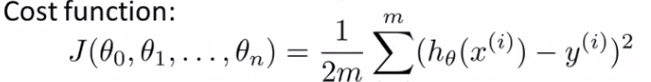

**Gradient Descent**

To minimize the cost function, we conceptually must take the derivative of it and set it equal to zero, then solve for our unkown parameters.

This can be quite complicated to do manually, but once again, there are computer algorithms written to make this process easy for you.

The update rule for the cost function now looks slightly different: 

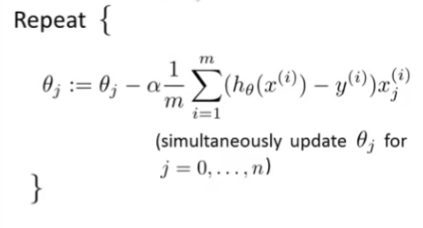

The difference between this update rule and the one for univariate linear regression is that 'j' denotes the feature you are minimizing.

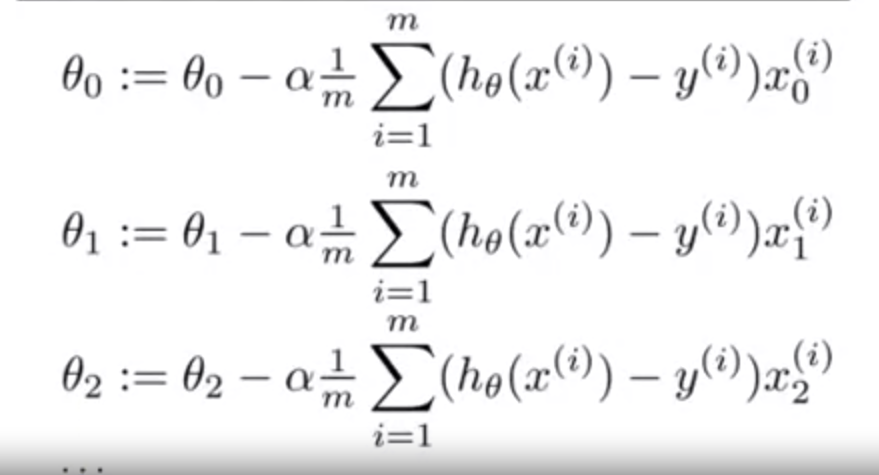

Writting the update rule in terms of individual features can help yo to see that this equation is th same as the one for univariate linear regression

**End Notes** 

There are many tools available in code, such as sklearn, that make it quite easy to do the computational steps of linear regression.

The main challenges in linear regession, and modelling in general, are recognizing the opportunity for a proper use of a model, properly implementing that model, and effectively interpreting and communicating what you can learn from the model.

Figures from:

https://machinelearningmedium.com/2017/08/23/multivariate-linear-regression/

https://www.coursera.org/learn/machine-learning